# Analysis of power law distributions

This code is an example on how to apply the file 'power_law_analysis.py' to the analysis of the power law distributions of repertoires.

The notebook contains:
1. Analysis of the distribution

## Imports

- _numpy_ for math operations
- _matplotlib_ for graphic representations
- _pandas_ for operations with DataFrames
- _lmfit_ for non-linear least squares fitting 
- _power_law_analysis_ for the characterisation of the power law distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from lmfit import Model, Parameters
import power_law_analysis as plw

## Loading data

To read the repertoires, the user needs to create:

- directory_read_patients: directory where all the repertoires are stored
- reduced_patients.txt: .txt file that contains, in separate rows, all the dataset names and is stored in the same directory

In [2]:
read_path = '/home/pablo/Documentos/internship/emerson/files_red_bis/'
file_patients = 'reduced_patients.txt'
reduced_patients = pd.read_csv(read_path+file_patients, names=['file_patients'])

In [3]:
reduced_patients

,file_patients
0,HIP00110.tsv.gz
1,HIP00169.tsv.gz
2,HIP00594.tsv.gz
3,HIP00602.tsv.gz
4,HIP00614.tsv.gz
...,...
627,HIP17887.tsv.gz
628,HIP19048.tsv.gz
629,HIP19089.tsv.gz
630,HIP19716.tsv.gz


## 1. Analysis of the distribution

For an example sample of L = 10 patients:

- The function 'exponent_fit' provides a fit of the patient's repertoire to a power law
- The function 'exponent_analysis' prepares the resulting exponents for their posterior analysis

Change L = 10 for L = len(reduced_patients) to obtain the full set of Emerson exponents

### A. Fit to power law

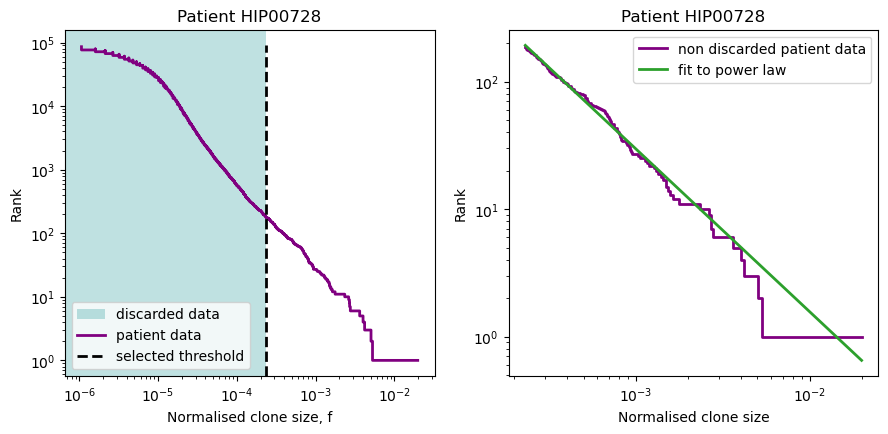

In [4]:
fit_results = []
for file_name in reduced_patients['file_patients'][:10]:
    plt.close()
    fit_results.append(plw.exponent_fit(file_name, read_path))
plt.show()

In [5]:
fit_results = pd.DataFrame(fit_results, columns = ['a', 'r2', 'valid'])
fit_results

,a,r2,valid
0,1.280064,0.996022,yes
1,1.160175,0.985273,yes
2,0.778580,0.973761,no
3,1.157690,0.990460,yes
4,1.579612,0.988991,yes
5,1.532749,0.992784,yes
6,1.010430,0.996776,yes
7,1.905079,0.983078,yes
8,1.190244,0.982857,yes
9,1.278843,0.992299,yes


### B. Analysis of the fit results

In [6]:
analysis_results = plw.exponent_analysis(fit_results)
analysis_results

,a,b
0,1.280064,-0.552743
1,1.160175,-0.795406
3,1.157690,-0.802196
4,1.579612,-0.236862
5,1.532749,-0.273477
6,1.010430,-1.981717
7,1.905079,-0.043313
8,1.190244,-0.720690
9,1.278843,-0.554641
